<a href="https://colab.research.google.com/github/curiasuncc/4105-Intro-To-ML/blob/main/logisticregressionP2HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
#importing the necessary variables
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [15]:
#load the iris dataset
#iris=datasets.load_iris()

#create x from the features
#X=iris.data
#create Y from output
#y=iris.target


In [16]:
dataset = pd.read_csv('/content/diabetes.csv') 

In [17]:
X = dataset.iloc[:, [0,1,2,3,4,5,6,7]].values #all variables in dataset
y = dataset.iloc[:, 8].values   #outcome values 

In [18]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=0)

In [19]:
#create a scalar object
sc=StandardScaler()

#Fit the scaler to the training data and transform
X_train_std=sc.fit_transform(X_train)

#apply the scaler to the test data
X_test_std =sc.transform(X_test)

In [20]:
C=[10,1,.1,.001]
for c in C:
  clf=LogisticRegression(penalty='l1',C=c,solver='liblinear')
  clf.fit(X_train,y_train)
  print('C:',c)
  print('training accuracy:',clf.score(X_train_std,y_train))
  print('test accuracy:',clf.score(X_test_std,y_test))
  print('')


C: 10
training accuracy: 0.6400651465798045
test accuracy: 0.6948051948051948

C: 1
training accuracy: 0.6400651465798045
test accuracy: 0.6948051948051948

C: 0.1
training accuracy: 0.6400651465798045
test accuracy: 0.6948051948051948

C: 0.001
training accuracy: 0.5195439739413681
test accuracy: 0.5064935064935064



In [21]:
#5 fold selcted
kfold=KFold(n_splits=5,random_state=0,shuffle=True)
model=LogisticRegression(solver='liblinear')
results= cross_val_score(model,X,y,cv=kfold)
#output the accuracy calculate the mean and std across all folds
print("accuracy: %.3f%% (%.3f%%)" %(results.mean()*100.0,results.std()*100.0))

accuracy: 76.555% (3.185%)


In [22]:
#constrruct a confusion matrix
from sklearn.model_selection import train_test_split
test_size=0.33
seed=0
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=test_size,random_state=seed)
model=LogisticRegression(solver='liblinear')
model.fit(X_train,Y_train)
predicted=model.predict(X_test)
matrix=confusion_matrix(Y_test,predicted)
print(matrix)

[[156  14]
 [ 39  45]]


In [23]:
#constrruct a confusion matrix
from sklearn.model_selection import train_test_split
test_size=0.33
seed=0
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=test_size,random_state=seed)
model=LogisticRegression(solver='liblinear')
model.fit(X_train,Y_train)
predicted=model.predict(X_test)
matrix=confusion_matrix(Y_test,predicted)
report= classification_report(Y_test,predicted)
print(report)


              precision    recall  f1-score   support

           0       0.80      0.92      0.85       170
           1       0.76      0.54      0.63        84

    accuracy                           0.79       254
   macro avg       0.78      0.73      0.74       254
weighted avg       0.79      0.79      0.78       254



Text(0.5, 257.44, 'predicted label')

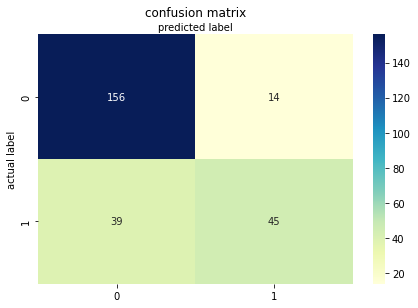

In [24]:
#visualize results of the model in form of confusion matrix
#will use heatmap for this
import seaborn as sns
from matplotlib.colors import ListedColormap
class_names=[0,1] #number of classes
fig, ax=plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
#create heatmap
sns.heatmap(pd.DataFrame(matrix),annot=True,cmap="YlGnBu",fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('confusion matrix',y=1.1)
plt.ylabel('actual label')
plt.xlabel('predicted label')